# Author: Samwel Waiyaki
## Using Machine learning Models to predict Heart Disease 

In [2]:
#Load Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data exploration

#### Data dimension

In [4]:
heartdata.shape

(303, 14)

#### Creating gender and target categories 

In [5]:
heartdata['sex'].replace(0, 'Female', inplace=True) 
heartdata['sex'].replace(1,'Male', inplace=True)
heartdata['fbs'].replace(1,'True', inplace=True)
heartdata['fbs'].replace(0,'False', inplace=True)
heartdata['exang'].replace(1,'yes', inplace=True)
heartdata['exang'].replace(0,'no', inplace=True)
heartdata['target'].replace(1,'Y', inplace=True)
heartdata['target'].replace(0,'N', inplace=True)

### Categorical data exploration

#### Distribution of the target variable

In [6]:
heartdata['target'].value_counts(normalize=True)

Y    0.544554
N    0.455446
Name: target, dtype: float64

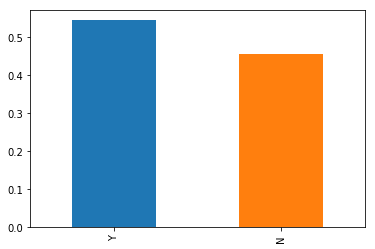

In [7]:
heartdata['target'].value_counts(normalize=True).plot.bar(figsize=(6, 4))

#### Distribution of the sex variable

In [8]:
heartdata['sex'].value_counts(normalize=True)

Male      0.683168
Female    0.316832
Name: sex, dtype: float64

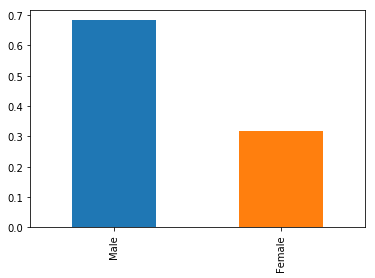

In [9]:
heartdata['sex'].value_counts(normalize=True).plot.bar(figsize=(6, 4))

In [10]:
heartdata['fbs'].value_counts(normalize=True)

False    0.851485
True     0.148515
Name: fbs, dtype: float64

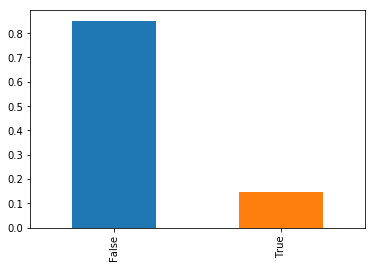

In [11]:
heartdata['fbs'].value_counts(normalize=True).plot.bar(figsize=(6, 4))

In [12]:
heartdata['exang'].value_counts(normalize=True)

no     0.673267
yes    0.326733
Name: exang, dtype: float64

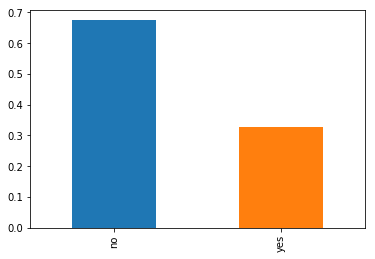

In [13]:
heartdata['exang'].value_counts(normalize=True).plot.bar(figsize=(6, 4))

#### Bivariate categorical data exploration with respect to the target variable

In [14]:
Gender=pd.crosstab(heartdata['sex'],heartdata['target']) 
Fasting_Blood_sugar=pd.crosstab(heartdata['fbs'],heartdata['target']) 
Exercise_Angina=pd.crosstab(heartdata['exang'],heartdata['target']) 

print(Gender)
print(Fasting_Blood_sugar)
print(Exercise_Angina)

target    N   Y
sex            
Female   24  72
Male    114  93
target    N    Y
fbs             
False   116  142
True     22   23
target   N    Y
exang          
no      62  142
yes     76   23


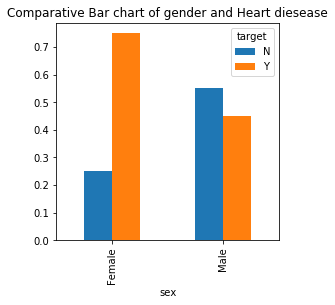

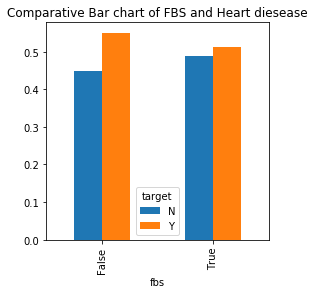

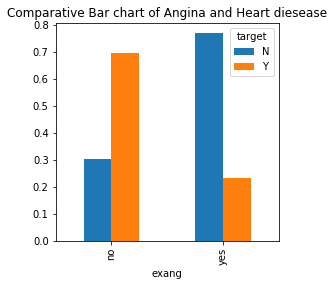

In [15]:

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.title('Comparative Bar chart of gender and Heart diesease')
plt.show() 
Fasting_Blood_sugar.div(Fasting_Blood_sugar.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4)) 
plt.title('Comparative Bar chart of FBS and Heart diesease')
plt.show() 
Exercise_Angina.div(Exercise_Angina.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4)) 
plt.title('Comparative Bar chart of Angina and Heart diesease')
plt.show() 


### Univeriate continuous data exploration

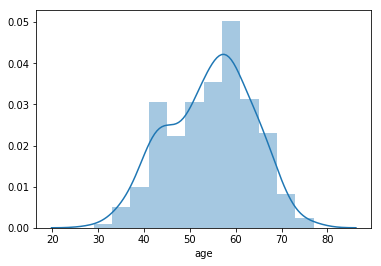

In [16]:
sns.distplot(heartdata['age'])


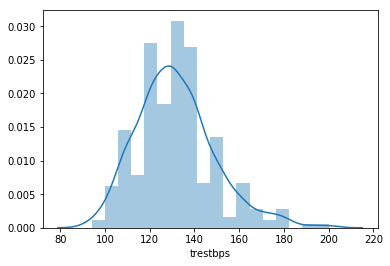

In [17]:
sns.distplot(heartdata['trestbps'])


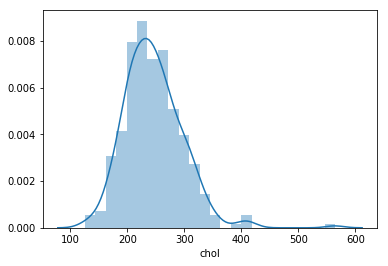

In [18]:
sns.distplot(heartdata['chol'])


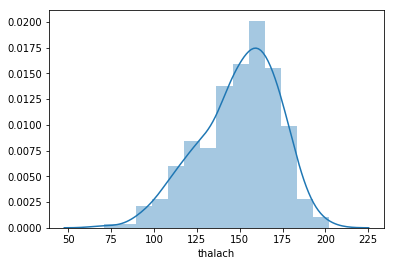

In [19]:
sns.distplot(heartdata['thalach'])

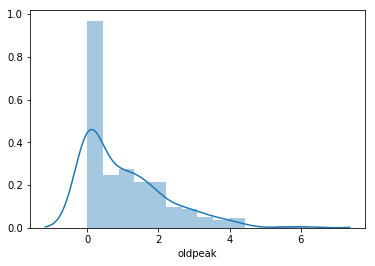

In [20]:
sns.distplot(heartdata['oldpeak'])

In [21]:
### Bivariate Continuous data exploration

In [22]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F17E28EBA8>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

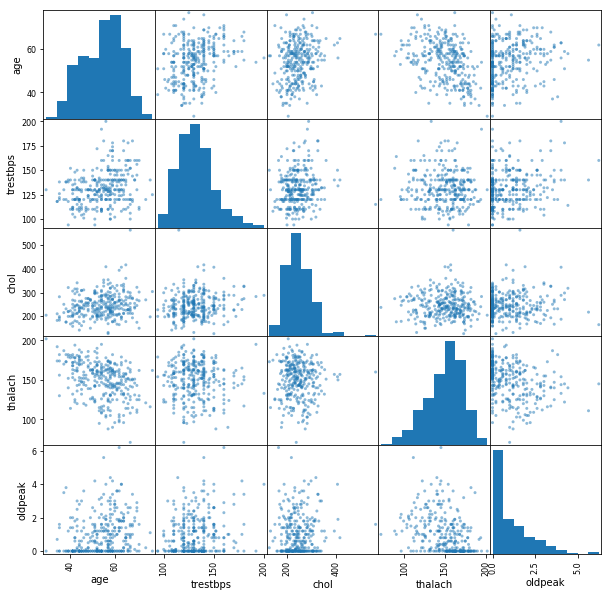

In [23]:
fig = plt.figure(figsize = (10, 10))
scatter_matrix(heartdata[['age','trestbps','chol','thalach','oldpeak']], figsize = (10, 10))

In [24]:
matrix = heartdata.corr()


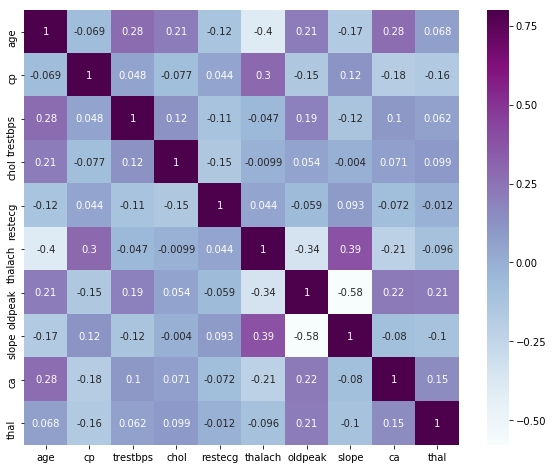

In [25]:
fig = plt.figure(figsize=(10, 8)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)

# BUILDING MACHINE LEARNING MODELS

### Coding categorical data into numeric

In [26]:
heartdata['sex'].replace('Female',0, inplace=True) 
heartdata['sex'].replace('Male',1, inplace=True)
heartdata['fbs'].replace('True',1, inplace=True)
heartdata['fbs'].replace('False',0, inplace=True)
heartdata['exang'].replace('yes',1, inplace=True)
heartdata['exang'].replace('no',0, inplace=True)
heartdata['target'].replace('Y',1, inplace=True)
heartdata['target'].replace('N',0, inplace=True)

### Reshufling the dataset

In [27]:
import sklearn
shufled_heardata = sklearn.utils.shuffle(heartdata)
shufled_heardata.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0


age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

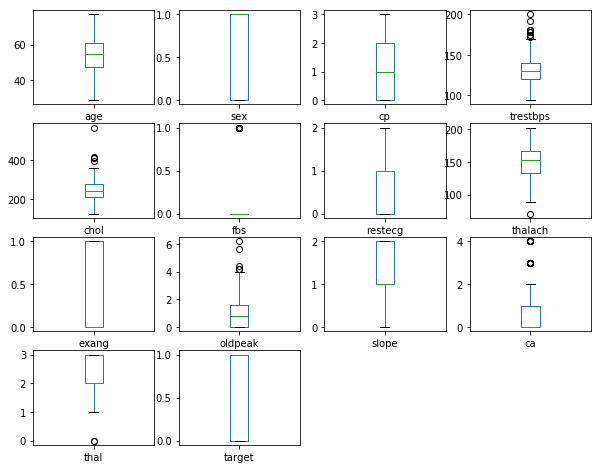

In [28]:
shufled_heardata.plot(kind='box', layout =(4,4), subplots=True, sharex=False, figsize = (10, 8))

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
X = shufled_heardata.drop('target', 1)
y = shufled_heardata.target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 13) (76, 13) (227,) (76,)


In [32]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [33]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

In [34]:

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_normalized, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_normalized, y_test))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
model score: 0.776
SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
model score: 0.618
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model score: 0.816
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_

In [35]:
X_normalized = normalizer.fit_transform(X)

LR: 0.822151 (0.079101)
RF: 0.801720 (0.067044)
KNN: 0.818387 (0.062961)
DTC: 0.801935 (0.044661)


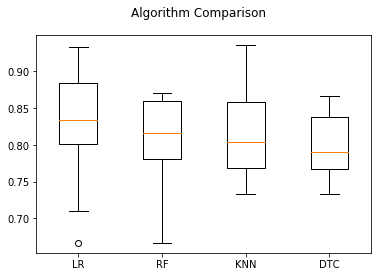

In [36]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_normalized, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
    

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier

In [38]:
xgb_model = XGBClassifier().fit(X_train_normalized, y_train)


In [39]:
xgb_pred = xgb_model.predict(X_test_normalized)

In [40]:
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [41]:
confusion_matrix(xgb_pred, y_test)

array([[21,  8],
       [ 8, 39]], dtype=int64)

In [42]:
roc_auc_score(xgb_pred, y_test)

0.776962582538518

In [43]:
precision_score(xgb_pred, y_test)

0.8297872340425532

In [44]:
recall_score(xgb_pred, y_test)

0.8297872340425532

In [45]:

print('Accuracy of xgboost model {:.3f}: '.format(xgb_model.score(X_test_normalized, y_test)))

Accuracy of xgboost model 0.789: 


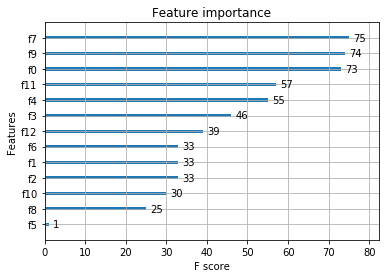

In [46]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()